<a href="https://colab.research.google.com/github/sakshivedi-1/EYE_DROWSINESS/blob/main/Eye_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics   #it provides easy to use ,high performance implementation of YOLO

#YOLO is good for object detection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import zipfile
import os

# Path to your image dataset folder
dataset_path = '/content/drive/MyDrive/Eye_drowziess/data/Preprocessed data'  # e.g., 'C:/Users/YourName/Documents/dataset'
zip_output_path = '/content/drive/MyDrive/Eye_drowziess/data/Preprocessed data/data.zip'  # e.g., 'C:/Users/YourName/Documents/dataset.zip'

# Create the zip file
with zipfile.ZipFile(zip_output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                full_path = os.path.join(root, file)
                arcname = os.path.relpath(full_path, start=dataset_path)  # Keep folder structure
                zipf.write(full_path, arcname)

print(f"[INFO] Image dataset successfully zipped at: {zip_output_path}")


[INFO] Image dataset successfully zipped at: /content/drive/MyDrive/Eye_drowziess/data/Preprocessed data/data.zip


In [ ]:
from ultralytics import YOLO

# Load YOLOv8 detection model (NOT segmentation)
model = YOLO("yolov8s.pt")  # Automatically downloads if not present

# Train the model
model.train(
    data="/content/drive/MyDrive/Eye_drowziess/data/data.yaml",
    epochs=100,
    imgsz=640,
    batch=8
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 282MB/s]


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Eye_drowziess/data/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

100%|██████████| 755k/755k [00:00<00:00, 42.0MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2116822  ultralytics.nn.modules.head.Detect           [2, [128, 256, 512]]          
Model summary: 129 layers, 11,136,374 parameters, 11,136,358 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 152MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.3±0.0 MB/s, size: 135.4 KB)


train: Scanning /content/drive/MyDrive/Eye_drowziess/data/Preprocessed data/labels/train... 85 images, 0 backgrounds, 0 corrupt: 100%|██████████| 85/85 [01:25<00:00,  1.00s/it]

train: New cache created: /content/drive/MyDrive/Eye_drowziess/data/Preprocessed data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.9±0.4 ms, read: 0.3±0.0 MB/s, size: 129.7 KB)


val: Scanning /content/drive/MyDrive/Eye_drowziess/data/Preprocessed data/labels/val... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]

val: New cache created: /content/drive/MyDrive/Eye_drowziess/data/Preprocessed data/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.95G      3.313      11.47      2.584         12        640: 100%|██████████| 11/11 [00:04<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all         34         34          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.09G      2.006      3.742      1.717          6        640: 100%|██████████| 11/11 [00:02<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]

                   all         34         34      0.498      0.618      0.555      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.13G        1.7      2.419      1.608         12        640: 100%|██████████| 11/11 [00:02<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.86it/s]

                   all         34         34      0.306        0.7       0.49      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.17G      1.716      2.007      1.529         11        640: 100%|██████████| 11/11 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.52it/s]


                   all         34         34      0.432      0.756      0.678      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.17G      1.562       1.74      1.428         13        640: 100%|██████████| 11/11 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all         34         34      0.655      0.735      0.742       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.19G      1.572      2.162      1.501         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.65it/s]

                   all         34         34      0.332      0.647      0.334      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.2G      1.604      1.852      1.511         10        640: 100%|██████████| 11/11 [00:02<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.75it/s]

                   all         34         34      0.443      0.526      0.511      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.21G      1.598      1.874      1.473          8        640: 100%|██████████| 11/11 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]

                   all         34         34      0.692      0.559      0.722      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.24G       1.64       1.98      1.497         13        640: 100%|██████████| 11/11 [00:02<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]

                   all         34         34      0.572      0.805       0.75      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.24G      1.683      1.754      1.524         10        640: 100%|██████████| 11/11 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.10it/s]

                   all         34         34      0.829      0.912      0.948      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.24G      1.667      1.785       1.52         11        640: 100%|██████████| 11/11 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.28it/s]

                   all         34         34      0.641      0.693      0.819      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.24G      1.537      1.705      1.489          6        640: 100%|██████████| 11/11 [00:02<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]

                   all         34         34      0.486      0.794      0.532       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.24G      1.534      1.356       1.45         12        640: 100%|██████████| 11/11 [00:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]

                   all         34         34      0.542      0.807      0.712      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.24G      1.534       1.36      1.426         11        640: 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]

                   all         34         34      0.602      0.771      0.691      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.24G      1.443      1.175      1.387         10        640: 100%|██████████| 11/11 [00:01<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.90it/s]

                   all         34         34      0.798      0.692      0.826      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.24G      1.489      1.073      1.427         10        640: 100%|██████████| 11/11 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]

                   all         34         34      0.974      0.644      0.847      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.24G      1.492      1.025      1.421         14        640: 100%|██████████| 11/11 [00:02<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]

                   all         34         34      0.874      0.912      0.972      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.24G      1.468     0.9907      1.384         14        640: 100%|██████████| 11/11 [00:02<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         34         34      0.964      0.912      0.969      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.24G      1.439     0.8945      1.375         11        640: 100%|██████████| 11/11 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]

                   all         34         34       0.97      0.934      0.985      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.24G      1.293      0.883       1.31         11        640: 100%|██████████| 11/11 [00:02<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]

                   all         34         34       0.98      0.996      0.995      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.24G      1.475     0.9373      1.423          7        640: 100%|██████████| 11/11 [00:01<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.32it/s]

                   all         34         34      0.945      0.971      0.987      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.24G      1.416     0.9127      1.369          8        640: 100%|██████████| 11/11 [00:02<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]

                   all         34         34      0.988      0.949      0.992      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.24G      1.447     0.9867       1.35          9        640: 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.99it/s]

                   all         34         34       0.96      0.941      0.989      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.24G      1.363     0.9279      1.289          9        640: 100%|██████████| 11/11 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.05it/s]


                   all         34         34      0.828      0.978       0.99      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.28G      1.364      1.046      1.371          7        640: 100%|██████████| 11/11 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]

                   all         34         34      0.981      0.965      0.994      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.31G      1.353     0.8728      1.345         10        640: 100%|██████████| 11/11 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]


                   all         34         34      0.971      0.954      0.987      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.31G      1.301     0.8372      1.284          9        640: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         34         34      0.933      0.958      0.994      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.31G      1.371     0.8925      1.372          7        640: 100%|██████████| 11/11 [00:01<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]

                   all         34         34       0.92          1      0.994      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.37G      1.348     0.8353      1.344          7        640: 100%|██████████| 11/11 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]

                   all         34         34      0.977          1      0.995      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.37G       1.26     0.7793      1.287          6        640: 100%|██████████| 11/11 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.39it/s]

                   all         34         34      0.992          1      0.995      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.37G      1.283     0.8007      1.243          9        640: 100%|██████████| 11/11 [00:02<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]

                   all         34         34      0.982          1      0.995      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.44G      1.297     0.7656       1.32         11        640: 100%|██████████| 11/11 [00:02<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.69it/s]

                   all         34         34      0.987          1      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.44G      1.262      0.787      1.273          9        640: 100%|██████████| 11/11 [00:01<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.84it/s]

                   all         34         34       0.94          1      0.995      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.44G      1.223     0.7563      1.248         11        640: 100%|██████████| 11/11 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         34         34      0.992      0.925      0.995      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.44G        1.2     0.7752      1.238         10        640: 100%|██████████| 11/11 [00:01<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]

                   all         34         34      0.947          1      0.995      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.44G      1.146     0.7091      1.217         15        640: 100%|██████████| 11/11 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]

                   all         34         34      0.937          1      0.995       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.44G      1.179     0.6811      1.239          8        640: 100%|██████████| 11/11 [00:02<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]

                   all         34         34      0.991          1      0.995      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.44G      1.376     0.7603      1.329         16        640: 100%|██████████| 11/11 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]

                   all         34         34      0.991          1      0.995      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.44G      1.302     0.7257      1.312         10        640: 100%|██████████| 11/11 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]

                   all         34         34      0.995      0.998      0.995      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.44G      1.218     0.7149       1.24          7        640: 100%|██████████| 11/11 [00:01<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]

                   all         34         34      0.994      0.998      0.995      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.44G       1.23     0.7177      1.256         13        640: 100%|██████████| 11/11 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]

                   all         34         34      0.995      0.968      0.994      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.44G      1.239     0.7348      1.273         13        640: 100%|██████████| 11/11 [00:01<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.81it/s]

                   all         34         34       0.99      0.971      0.994      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.44G      1.202     0.7111      1.285          5        640: 100%|██████████| 11/11 [00:01<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.74it/s]


                   all         34         34      0.965          1      0.994      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.44G      1.163     0.6647      1.235         10        640: 100%|██████████| 11/11 [00:01<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.76it/s]

                   all         34         34      0.951      0.983      0.995      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.44G      1.169     0.6765      1.185         13        640: 100%|██████████| 11/11 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         34         34      0.953      0.996      0.995      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.44G      1.129     0.6432      1.262         12        640: 100%|██████████| 11/11 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.47it/s]

                   all         34         34      0.991      0.981      0.995       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.44G      1.205     0.6653      1.248         12        640: 100%|██████████| 11/11 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.61it/s]

                   all         34         34       0.96      0.998      0.995      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.44G       1.13     0.6632      1.187          9        640: 100%|██████████| 11/11 [00:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.83it/s]

                   all         34         34       0.95      0.997      0.995      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.44G      1.171     0.6843      1.254         10        640: 100%|██████████| 11/11 [00:02<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]

                   all         34         34      0.962      0.973      0.989      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.44G      1.125     0.6507       1.18          8        640: 100%|██████████| 11/11 [00:02<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         34         34      0.967      0.973      0.992      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.44G      1.127     0.6371      1.185         12        640: 100%|██████████| 11/11 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]

                   all         34         34      0.949      0.994      0.982      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.44G      1.171      0.654      1.185         11        640: 100%|██████████| 11/11 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]

                   all         34         34      0.958      0.997      0.992      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.44G      1.107     0.6634      1.236         10        640: 100%|██████████| 11/11 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]

                   all         34         34      0.966      0.971      0.986      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.44G      1.112     0.5894      1.164         12        640: 100%|██████████| 11/11 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.59it/s]

                   all         34         34      0.957      0.971      0.968      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.44G      1.093     0.6602      1.163          5        640: 100%|██████████| 11/11 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.03it/s]

                   all         34         34      0.927      0.971      0.967      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.44G      1.214     0.6521       1.24          7        640: 100%|██████████| 11/11 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]

                   all         34         34      0.941      0.971      0.981      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.44G      1.078     0.6117      1.204         12        640: 100%|██████████| 11/11 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.77it/s]

                   all         34         34      0.965      0.998      0.989      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.44G        1.1     0.6158      1.197         10        640: 100%|██████████| 11/11 [00:01<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.74it/s]

                   all         34         34      0.954      0.997      0.987      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.44G      1.012     0.5905      1.144         10        640: 100%|██████████| 11/11 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         34         34      0.949      0.993      0.987      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.44G      1.075     0.6382      1.142         12        640: 100%|██████████| 11/11 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]

                   all         34         34      0.967      0.971      0.987      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.44G      1.042     0.6094      1.126          8        640: 100%|██████████| 11/11 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]

                   all         34         34      0.967      0.971      0.987      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.44G      1.028      0.566       1.11         11        640: 100%|██████████| 11/11 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.59it/s]

                   all         34         34      0.949      0.995      0.992      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.44G      1.038     0.5922      1.131         14        640: 100%|██████████| 11/11 [00:02<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.74it/s]

                   all         34         34      0.949      0.996       0.99      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.44G      1.009     0.5982      1.135         10        640: 100%|██████████| 11/11 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.37it/s]

                   all         34         34      0.949      0.997       0.99      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.44G      1.054     0.5671      1.139          8        640: 100%|██████████| 11/11 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]

                   all         34         34      0.969      0.973      0.974      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.44G      1.052     0.5656      1.175         12        640: 100%|██████████| 11/11 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]


                   all         34         34      0.968      0.973      0.976      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.44G       1.01     0.5786      1.173         12        640: 100%|██████████| 11/11 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.34it/s]

                   all         34         34      0.968      0.973      0.979      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.44G      1.017     0.6047       1.11         10        640: 100%|██████████| 11/11 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         34         34       0.95      0.998       0.99       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.44G      1.063     0.5637       1.15          8        640: 100%|██████████| 11/11 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.83it/s]

                   all         34         34      0.949      0.997      0.987      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.44G     0.9856     0.5697      1.161          9        640: 100%|██████████| 11/11 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.76it/s]


                   all         34         34      0.954      0.998      0.987      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.44G     0.9618     0.5238      1.129          9        640: 100%|██████████| 11/11 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]

                   all         34         34      0.954      0.998      0.994      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.44G      1.032      0.568      1.135          6        640: 100%|██████████| 11/11 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]

                   all         34         34      0.956      0.998      0.994      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.44G     0.9925     0.5293      1.132          7        640: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         34         34      0.957      0.998      0.994      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.44G      1.029     0.5576      1.137          8        640: 100%|██████████| 11/11 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]

                   all         34         34       0.97      0.974      0.992      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.44G     0.9518     0.5534      1.144         11        640: 100%|██████████| 11/11 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.88it/s]

                   all         34         34      0.959      0.973      0.985      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.44G      1.001      0.574      1.111          8        640: 100%|██████████| 11/11 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


                   all         34         34      0.928      0.963      0.982       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.44G      1.032     0.5766      1.112          9        640: 100%|██████████| 11/11 [00:02<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         34         34      0.951       0.97      0.982       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.44G     0.9542     0.5651      1.182          6        640: 100%|██████████| 11/11 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]

                   all         34         34      0.967      0.971      0.982      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.44G     0.9471     0.5227       1.08          9        640: 100%|██████████| 11/11 [00:01<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.16it/s]


                   all         34         34      0.965      0.971      0.982      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.44G     0.9886     0.5424      1.112         13        640: 100%|██████████| 11/11 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.69it/s]

                   all         34         34      0.966      0.971      0.977      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.44G     0.9386     0.5121      1.077         14        640: 100%|██████████| 11/11 [00:02<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]

                   all         34         34      0.956      0.971      0.981      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.44G       0.98     0.5478      1.151          9        640: 100%|██████████| 11/11 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.79it/s]

                   all         34         34      0.951      0.971      0.979      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.44G     0.9596     0.5478       1.09          8        640: 100%|██████████| 11/11 [00:02<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]

                   all         34         34      0.953      0.971      0.976      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.44G     0.8522     0.4771      1.017         10        640: 100%|██████████| 11/11 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.18it/s]

                   all         34         34      0.966      0.971      0.974      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.44G     0.9114      0.499      1.174          9        640: 100%|██████████| 11/11 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.27it/s]

                   all         34         34      0.968      0.971      0.974       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.44G     0.8781     0.4827      1.061         14        640: 100%|██████████| 11/11 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.77it/s]

                   all         34         34      0.967      0.971      0.974      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.44G     0.9893      0.534      1.143          9        640: 100%|██████████| 11/11 [00:02<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]

                   all         34         34       0.95      0.997      0.979      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.44G     0.9664     0.5169      1.088         10        640: 100%|██████████| 11/11 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.79it/s]

                   all         34         34       0.95      0.998      0.979       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.44G     0.9491      0.511      1.049          8        640: 100%|██████████| 11/11 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]

                   all         34         34      0.953      0.994      0.979      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.44G     0.8852     0.5121      1.102         14        640: 100%|██████████| 11/11 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.68it/s]

                   all         34         34       0.97      0.975      0.982      0.748


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.44G     0.8244     0.4706       1.08          5        640: 100%|██████████| 11/11 [00:04<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         34         34       0.97      0.975      0.982       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.44G     0.8865       0.47      1.089          5        640: 100%|██████████| 11/11 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.04it/s]

                   all         34         34      0.969      0.974      0.982       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.44G     0.8195      0.455      1.109          5        640: 100%|██████████| 11/11 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.88it/s]


                   all         34         34      0.967      0.971      0.981      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.44G     0.8242     0.4617      1.092          5        640: 100%|██████████| 11/11 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]

                   all         34         34      0.967      0.971      0.981       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.44G     0.8178     0.4624      1.114          5        640: 100%|██████████| 11/11 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all         34         34      0.966      0.971      0.981      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.44G     0.8101     0.5011      1.138          5        640: 100%|██████████| 11/11 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


                   all         34         34      0.966      0.971      0.981      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.44G     0.8223     0.4634      1.119          5        640: 100%|██████████| 11/11 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]

                   all         34         34      0.966      0.971      0.981      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.44G     0.7726     0.4404      1.088          5        640: 100%|██████████| 11/11 [00:01<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.15it/s]

                   all         34         34      0.966      0.971      0.981      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.44G     0.7941     0.4544      1.065          5        640: 100%|██████████| 11/11 [00:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]

                   all         34         34       0.97      0.975      0.982      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.44G     0.7541     0.4352      1.067          5        640: 100%|██████████| 11/11 [00:02<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         34         34       0.97      0.975      0.982       0.76



100 epochs completed in 0.093 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]


                   all         34         34       0.97      0.975      0.982      0.755
            closed_eye         17         17          1       0.95      0.995      0.747
              open_eye         17         17       0.94          1      0.969      0.762
Speed: 0.3ms preprocess, 6.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79c14cde1850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Set paths
base_path = "/content/drive/MyDrive/Eye_drowziess/data"
image_dir = os.path.join(base_path, "images")
label_dir = os.path.join(base_path, "labels")

output_base = "/content/drive/MyDrive/Eye_drowziess/data/Preprocessed data"
os.makedirs(output_base, exist_ok=True)


In [ ]:
# List of all image files
images = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))]

# Match labels
image_paths = [os.path.join(image_dir, f) for f in images]
label_paths = [os.path.join(label_dir, f.replace(".jpg", ".txt").replace(".png", ".txt")) for f in images]

# Train:Val:Test = 70:20:10
X_temp, X_test, y_temp, y_test = train_test_split(image_paths, label_paths, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2222, random_state=42)  # ~0.2 val


In [ ]:
def copy_files(image_list, label_list, split):
    os.makedirs(os.path.join(output_base, f"images/{split}"), exist_ok=True)
    os.makedirs(os.path.join(output_base, f"labels/{split}"), exist_ok=True)

    for img, lbl in zip(image_list, label_list):
        shutil.copy(img, os.path.join(output_base, f"images/{split}", os.path.basename(img)))
        shutil.copy(lbl, os.path.join(output_base, f"labels/{split}", os.path.basename(lbl)))

# Perform copying
copy_files(X_train, y_train, "train")
copy_files(X_val, y_val, "val")
copy_files(X_test, y_test, "test")


In [ ]:
from ultralytics import YOLO

# Load the model
model = YOLO('/content/runs/detect/train/weights/last.pt')  # or best.pt

# Run validation
metrics = model.val()
print(metrics)


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 56.7±4.4 MB/s, size: 131.7 KB)


val: Scanning /content/drive/MyDrive/Eye_drowziess/data/Preprocessed data/labels/val.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


                   all         34         34       0.97      0.975      0.982       0.76
            closed_eye         17         17          1       0.95      0.995      0.757
              open_eye         17         17       0.94          1      0.969      0.762
Speed: 9.2ms preprocess, 21.0ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79c16869f9d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0

In [ ]:
results = model.predict('/content/drive/MyDrive/Eye_drowziess/data/Preprocessed data/images/val/image10.jpg', save=True)



image 1/1 /content/drive/MyDrive/Eye_drowziess/data/Preprocessed data/images/val/image10.jpg: 384x640 1 closed_eye, 46.8ms
Speed: 2.4ms preprocess, 46.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


In [ ]:
# Optional: View path to best model after training
print(model.ckpt_path)  # Or check: model.trainer.save_dir

# Copy best.pt (or last.pt) to your Drive
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/your_folder_name/best.pt


/content/runs/detect/train/weights/last.pt
cp: cannot create regular file '/content/drive/MyDrive/your_folder_name/best.pt': No such file or directory


In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Run evaluation on the validation set (defined in your data.yaml)
metrics = model.val()


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 63.7±8.1 MB/s, size: 134.7 KB)


val: Scanning /content/drive/MyDrive/Eye_drowziess/data/Preprocessed data/labels/val.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


                   all         34         34       0.97      0.975      0.982       0.76
            closed_eye         17         17          1       0.95      0.995      0.757
              open_eye         17         17       0.94          1      0.969      0.762
Speed: 5.9ms preprocess, 7.8ms inference, 0.4ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
print(metrics.box)    # Box metrics (mAP50, mAP50-95, etc.)
print(metrics.confusion_matrix)
print(metrics.speed)  # Inference speed


ultralytics.utils.metrics.Metric object with attributes:

all_ap: array([[      0.995,       0.995,       0.995,     0.92541,     0.87777,     0.87777,     0.82444,     0.60932,      0.4079,    0.063208],
       [    0.96889,     0.96889,     0.96889,     0.96889,     0.96889,     0.96889,     0.89444,     0.61635,     0.27916,    0.017539]])
ap: array([    0.75708,     0.76208])
ap50: array([      0.995,     0.96889])
ap_class_index: array([0, 1])
curves: []
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.03803

In [1]:
from sklearn.metrics import precision_score, recall_score

# Example data (binary classification)
y_true = [0, 1, 1, 1, 0, 1, 0, 0, 1, 0]      # Ground truth (actual labels)
y_pred = [0, 1, 1, 0, 0, 1, 0, 1, 1, 0]      # Model predictions

# Calculate precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Precision: 0.80
Recall: 0.80


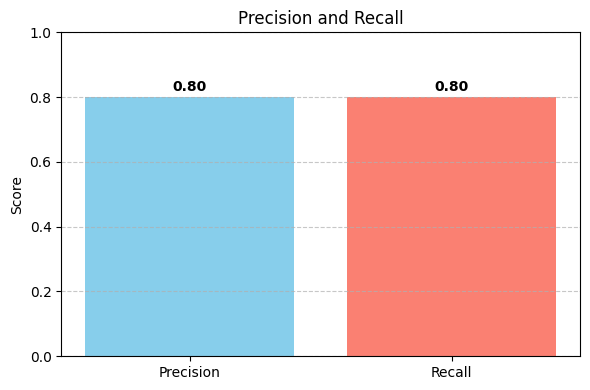

In [2]:
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

# Sample true and predicted labels
y_true = [0, 1, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 1, 0, 0, 1, 0, 1, 1, 0]

# Compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Plotting
metrics = ['Precision', 'Recall']
scores = [precision, recall]

plt.figure(figsize=(6, 4))
plt.bar(metrics, scores, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.title('Precision and Recall')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


In [4]:
from tensorflow.keras.losses import BinaryCrossentropy

loss_fn = BinaryCrossentropy()

# Example usage
y_true = [1, 0, 1]
y_pred = [0.9, 0.2, 0.8]

loss = loss_fn(y_true, y_pred)
print("Loss:", loss.numpy())


Loss: 0.18388253
